In [1]:
import pandas as pd

In [2]:
#pip install git+https://github.com/quantopian/pyfolio
# import again if first time not work
import pyfolio

/Users/jvsingh/anaconda3/envs/rlproject/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [3]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

In [4]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    print('Sharpe: ',(252**0.5)*df['daily_return'].mean()/ df['daily_return'].std())
    return df

In [5]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

In [6]:
def get_account_value(model_name):
    df_account_value=pd.DataFrame()
    for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
        fname = 'results/account_value_trade_{}_{}.csv'.format(model_name,i)
        print(f"Reading {fname}")
        temp = pd.read_csv(fname)
        df_account_value = df_account_value.append(temp,ignore_index=True)
    df_account_value = pd.DataFrame({'account_value':df_account_value['0']})
    sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
    print(sharpe)
    df_account_value=df_account_value.join(df_trade_date[63:].reset_index(drop=True))
    return df_account_value

## DJIA

In [7]:
dji = pd.read_csv("data/^DJI.csv")
test_dji=dji[(dji['Date']>='2016-01-01') & (dji['Date']<='2020-06-30')]
test_dji = test_dji.reset_index(drop=True)

In [8]:
test_dji.shape

(1131, 7)

In [9]:
test_dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


In [10]:
test_dji['daily_return']=test_dji['Adj Close'].pct_change(1)

In [11]:
dow_strat = backtest_strat(test_dji)

## Ensemble Strategy

In [12]:
df=pd.read_csv('data/dow_30_2009_2020.csv')

In [13]:
rebalance_window = 63
validation_window = 63
unique_trade_date = df[(df.datadate > 20151001)&(df.datadate <= 20200707)].datadate.unique()

In [14]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

In [15]:
ensemble_account_value = get_account_value('ensemble')

Reading results/account_value_trade_ensemble_126.csv
Reading results/account_value_trade_ensemble_189.csv
Reading results/account_value_trade_ensemble_252.csv
Reading results/account_value_trade_ensemble_315.csv
Reading results/account_value_trade_ensemble_378.csv
Reading results/account_value_trade_ensemble_441.csv
Reading results/account_value_trade_ensemble_504.csv
Reading results/account_value_trade_ensemble_567.csv
Reading results/account_value_trade_ensemble_630.csv
Reading results/account_value_trade_ensemble_693.csv
Reading results/account_value_trade_ensemble_756.csv
Reading results/account_value_trade_ensemble_819.csv
Reading results/account_value_trade_ensemble_882.csv
Reading results/account_value_trade_ensemble_945.csv
Reading results/account_value_trade_ensemble_1008.csv
Reading results/account_value_trade_ensemble_1071.csv
Reading results/account_value_trade_ensemble_1134.csv
Reading results/account_value_trade_ensemble_1197.csv
1.8293884450033215


In [16]:
ensemble_account_value

,account_value,datadate
0,1.000000e+06,20160104
1,9.998769e+05,20160105
2,9.958806e+05,20160106
3,9.900894e+05,20160107
4,9.875614e+05,20160108
...,...,...
1129,1.769625e+06,20200629
1130,1.769625e+06,20200630
1131,1.769625e+06,20200701
1132,1.769625e+06,20200702


In [17]:
# Jai
#print(ensemble_account_value.Date.values)
#ensemble_account_value

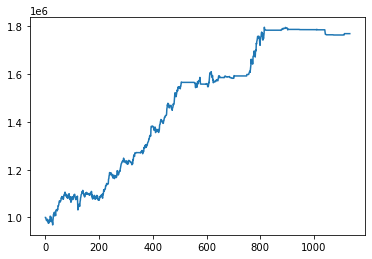

In [18]:
ensemble_account_value.account_value.plot()

In [19]:
ensemble_account_value = get_daily_return(ensemble_account_value)

Sharpe:  1.8293884450033215


In [20]:
ensemble_account_value['Date'] = test_dji['Date']

In [21]:
ensemble_account_value.head()

,account_value,datadate,daily_return,Date
0,1000000.000000,20160104,NaN,2016-01-04
1,999876.945225,20160105,-0.000123,2016-01-05
2,995880.579263,20160106,-0.003997,2016-01-06
3,990089.392574,20160107,-0.005815,2016-01-07
4,987561.351748,20160108,-0.002553,2016-01-08


In [22]:
ensemble_strat = backtest_strat(ensemble_account_value[0:1097])

In [23]:
ensemble_strat

Date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00   -0.000123
2016-01-06 00:00:00+00:00   -0.003997
2016-01-07 00:00:00+00:00   -0.005815
2016-01-08 00:00:00+00:00   -0.002553
                               ...   
2020-05-06 00:00:00+00:00    0.000000
2020-05-07 00:00:00+00:00    0.000000
2020-05-08 00:00:00+00:00    0.000000
2020-05-11 00:00:00+00:00    0.000000
2020-05-12 00:00:00+00:00    0.000000
Length: 1097, dtype: float64

In [24]:
#ensemble_account_value.to_csv('results/df_account_value_ensemble_daily_return.csv',index=False)

In [25]:
ensemble_strat

Date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00   -0.000123
2016-01-06 00:00:00+00:00   -0.003997
2016-01-07 00:00:00+00:00   -0.005815
2016-01-08 00:00:00+00:00   -0.002553
                               ...   
2020-05-06 00:00:00+00:00    0.000000
2020-05-07 00:00:00+00:00    0.000000
2020-05-08 00:00:00+00:00    0.000000
2020-05-11 00:00:00+00:00    0.000000
2020-05-12 00:00:00+00:00    0.000000
Length: 1097, dtype: float64

In [26]:
dow_strat

Date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00    0.000567
2016-01-06 00:00:00+00:00   -0.014695
2016-01-07 00:00:00+00:00   -0.023211
2016-01-08 00:00:00+00:00   -0.010152
                               ...   
2020-06-24 00:00:00+00:00   -0.027151
2020-06-25 00:00:00+00:00    0.011776
2020-06-26 00:00:00+00:00   -0.028356
2020-06-29 00:00:00+00:00    0.023196
2020-06-30 00:00:00+00:00    0.008481
Length: 1131, dtype: float64

Start date,2016-01-04
End date,2020-05-12
Total months,52
,Backtest
Annual return,13.9%
Cumulative returns,76.4%
Annual volatility,7.2%
Sharpe ratio,1.85
Calmar ratio,2.07
Stability,0.93
Max drawdown,-6.7%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,6.71,2016-04-19,2016-06-27,2016-07-20,67
1,3.72,2016-07-22,2016-10-18,2016-11-10,80
2,3.65,2016-01-29,2016-02-11,2016-02-17,14
3,2.88,2018-06-15,2018-06-27,2019-01-10,150
4,2.45,2018-04-17,2018-05-31,2018-06-07,38


Stress Events,mean,min,max
New Normal,0.05%,-3.14%,2.38%


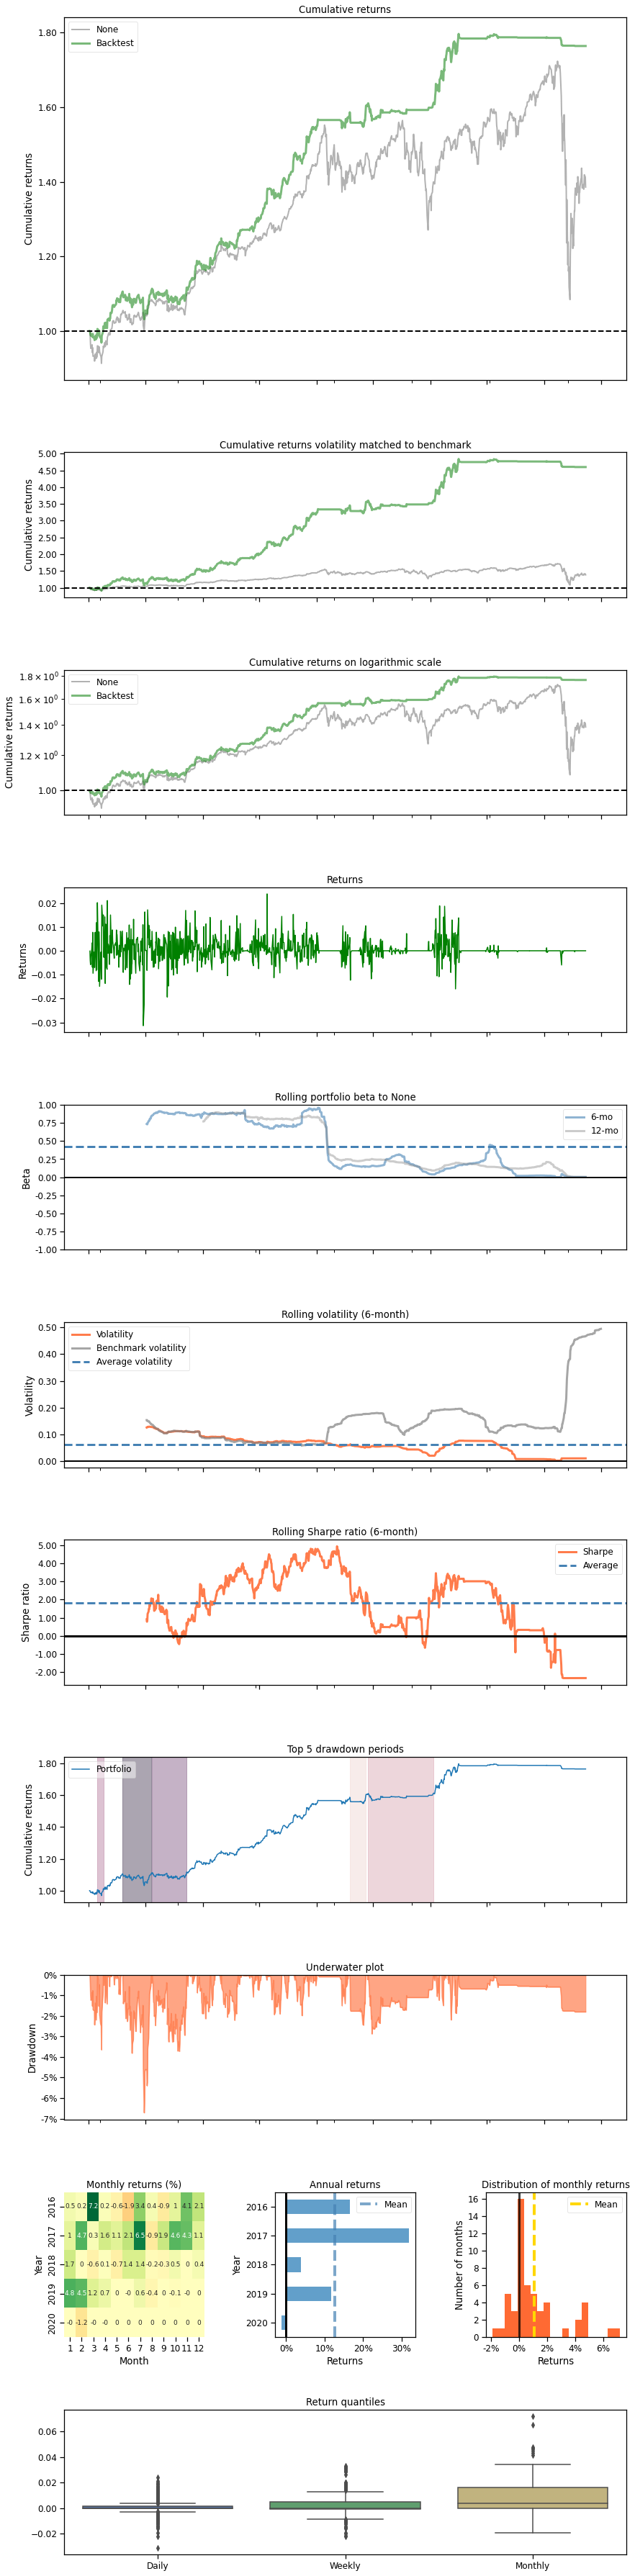

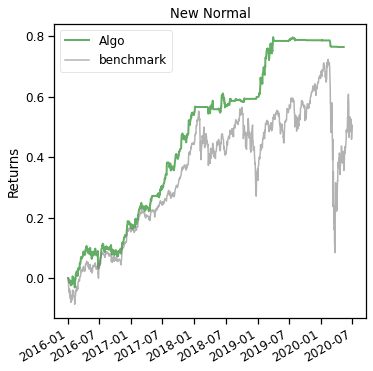

In [27]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = ensemble_strat,
                                   benchmark_rets=dow_strat, set_context=False)